In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, roc_curve, auc
)
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv", low_memory=False)


In [3]:
# printing the first five rows
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231,Good


In [4]:
# Binary target: Good = 1, else = 0
df = df[df["Credit_Score"].notna()]  # remove missing targets
df["Target"] = (df["Credit_Score"].str.lower() == "good").astype(int)

In [5]:
# Drop irrelevant columns
df.drop(columns=["ID", "Customer_ID", "Name", "SSN", "Credit_Score", "Month"], inplace=True)

In [6]:
# Separate features and target
X = df.drop(columns=["Target"])
y = df["Target"]


In [7]:
# Clean invalid strings (replace with NaN)
X.replace("__-333333333333333333333333333__", np.nan, inplace=True)

In [8]:
# Ensure numeric columns are clean (force invalid entries to NaN)
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors="coerce")


In [9]:
# Identify column types
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()


In [18]:
# Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

In [10]:
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

In [11]:
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numerical_cols),
    ("cat", categorical_transformer, categorical_cols)
])

NameError: name 'numeric_transformer' is not defined

In [21]:
# Full pipeline
clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

In [22]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [23]:
# Train model
clf.fit(X_train, y_train)

C:\Users\karth\anaconda3\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['Occupation' 'Type_of_Loan' 'Credit_Mix' 'Credit_History_Age'
 'Payment_of_Min_Amount' 'Payment_Behaviour']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Occupation',
                                                   'Annual_Income',
                                                   'Monthly_Inhand_Salary',
                                                   'Num_Bank_Accounts',
                                                   'Num_Credit_Card',
                                                   'Interest_Rate',
                                                   'Num_of_Loan',
                                                   'Type_of_Loan',
                                                   'Delay_from_due_date',
                                                   'Num_of_Delayed_Payment...
                                                   'Outstanding_Debt',
                                                   'Credit_Utilization_Ratio',
                                                   'Credit_History_Age',
                                                   'Payment_of_Min_Amount',
                                                   'Total_EMI_per_month',
                                                   'Amount_invested_monthly',
                                                   'Payment_Behaviour',
                                                   'Monthly_Balance']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [24]:
# Predictions
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

C:\Users\karth\anaconda3\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['Occupation' 'Type_of_Loan' 'Credit_Mix' 'Credit_History_Age'
 'Payment_of_Min_Amount' 'Payment_Behaviour']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
C:\Users\karth\anaconda3\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['Occupation' 'Type_of_Loan' 'Credit_Mix' 'Credit_History_Age'
 'Payment_of_Min_Amount' 'Payment_Behaviour']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [25]:
# Evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.90     16434
           1       0.48      0.11      0.18      3566

    accuracy                           0.82     20000
   macro avg       0.66      0.54      0.54     20000
weighted avg       0.77      0.82      0.77     20000

Precision: 0.4756242568370987
Recall: 0.11217049915872125
F1 Score: 0.18152938506920807
ROC AUC: 0.8036919342421779


In [26]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

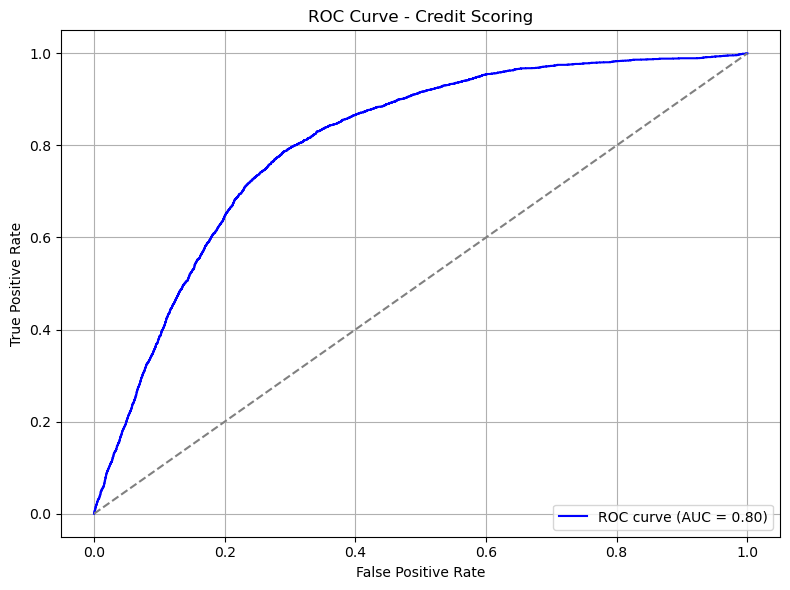

In [27]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Credit Scoring")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()